# Tracking the Moon over HERA's sky
#### By Jean Donet

As time passes the declination of the Moon changes in amplitude. Due to the Moon's 5.14$^{\circ}$ inclination relative to the Earth's equatorial plane, the Moon's absolute maximum and minimum declination ranges from 28.5$^{\circ}$  and 18.5$^{\circ}$, respectively. 

This dramatic change can be detrimental to HERA in the sense that as the Moon's declination amplitude increases, it will move closer to HERA's zenith. This presents the possible issue of the Moon's own flux density being detected by HERA. Alongside this effect, radio transmissions can be reflected by the Moon and be picked up by HERA. Another effect can be an attempt at Earth-Moon-Earth communications (EME), in which amateur radio operators use the Moon's reflective property to bounce a signal back to Earth. Of the frequencies EME is performed in, the one of interest to HERA is 144MHz.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.coordinates import Angle, EarthLocation, get_moon, get_sun
from astropy.units import deg
from pyuvdata import UVData
import os
import string
import pandas
%matplotlib notebook

## Retrieving Julian Dates

In order to find the Moon during HERA time integrations, we must first retrieve the Julian Dates (JDs) from the data set of interest. This can be done by setting the appropriate path as a string variable in the cell below.

In [102]:
path55 = "/data6/HERA/data/2458055/"

Once the path has been specified, we define the following ```get_julian_dates``` function, which takes in the path and outputs the respective JDs for the time integrations generated during that date.

In [103]:
def get_julian_dates(path):
    alpha_low  = list(string.ascii_lowercase)      #Setting lower-case alphabet
    alpha_high = list(string.ascii_uppercase)      #Setting upper-case alphabet
    jd_list = []                                   #Instantiating list for JDs
    for file in os.listdir(path):                  #Iterating over data directory
        if ".xx" in file:
            jd = ""                                #Setting empty string for individual date
            for char in file:                      #Iterating over the file name itself
                if char in alpha_low:
                    file = file.replace(char, "")  
                if char in alpha_high:
                    file = file.replace(char, "")
                if char in ".":
                    file = file.replace(char, "")  #Checking for other usual name chars
                if char in "_":
                    file = file.replace(char, "")
            file = list(file)                      #Date string to list to mutate JD
            file.insert(7,".")                     #Inserting delimiter for JD format
            file = ''.join(file)                   #Joining list into string
            jd   = jd + file                       #Assigning JD string to empty var
            jd_list.append(float(jd))              #Appending float version of JD to JD list


    jd_list = np.unique(jd_list)                   #Selecting unique values in case of repeat
    return jd_list                                 #Returning desired JD list

Now we can pass in the path desired to ```get_julian_dates```, and print below to ensure the correctness of the list generated.

In [104]:
jd55 = get_julian_dates(path55)     #Creating JD lists for different datasets
print jd55

[2458055.12552 2458055.13297 2458055.14043 2458055.14788 2458055.15534
 2458055.1628  2458055.17025 2458055.17771 2458055.18517 2458055.19262
 2458055.20008 2458055.20754 2458055.21499 2458055.22245 2458055.22991
 2458055.23736 2458055.24482 2458055.25228 2458055.25973 2458055.26719
 2458055.27465 2458055.2821  2458055.28956 2458055.29702 2458055.30447
 2458055.31193 2458055.31939 2458055.32684 2458055.3343  2458055.34175
 2458055.34921 2458055.35667 2458055.36412 2458055.37158 2458055.37904
 2458055.38649 2458055.39395 2458055.40141 2458055.40886 2458055.41632
 2458055.42378 2458055.43123 2458055.43869 2458055.44615 2458055.4536
 2458055.46106 2458055.46852 2458055.47597 2458055.48343 2458055.49089
 2458055.49834 2458055.5058  2458055.51326 2458055.52071 2458055.52817
 2458055.53562 2458055.54308 2458055.55054 2458055.55799 2458055.56545
 2458055.57291 2458055.58036 2458055.58782 2458055.59528 2458055.60273
 2458055.61019 2458055.61765 2458055.6251  2458055.63256 2458055.64002
 245805

## Setting location to HERA

We can find the Moon's Right Ascension (RA) and Declination (Dec) over HERA using the ```get_moon``` function from the ```astropy.coordinates``` module. We must first set the JDs as an ```astropy.time.Time``` object.

In [105]:
moon_times = jd55                  #Setting moon_times list from JD list
t = Time(moon_times, format='jd')  #Creating a Time object for get_moon, using julian time format

As another detail of the ```get_moon``` function, we need the latitude and longitude of HERA. Using the ```astropy.EarthLocation``` function, we set HERA's Earth coordinates.

In [106]:
#Setting HERA Latitude and Longitude
hera_lat = Angle((-30,43,17), unit=deg) 
hera_lon = Angle((21,35,42), unit=deg)

#Creating an EarthLocation object for HERA
HERA = EarthLocation(lat=hera_lat, lon=hera_lon)

Now that the parameters have been generated, we can intialize the ```get_moon``` function.

In [92]:
#Creating get_moon object at HERA's location
moonpath = get_moon(t,location=HERA) #Returns RA, DEC, Dist in (deg,deg,km)

## Visualizing the data

### A) Data Structures

Once the Moon's path over HERA has been generated we can take these values and represent them graphically. The ```get_moon``` function outputs its values in a specific ```SkyCoord``` format, this format is versatile yet it is difficult to input these values into a data structure directly. The cell below takes these values and constructs a ```pandas``` data frame in which organizes the RA and Dec into their appropriate ```hh:mm:ss``` and ```dd:mm:ss``` formats.

In [93]:
#Formatting the RA and dec to more familiar formats
ra_list  = []
dec_list = []

#Retrieving RA in HH:mm:ss format
for h,m,s in zip(moonpath.ra.hms[0],moonpath.ra.hms[1],moonpath.ra.hms[2]):
    ra = str(int(h))+"h "+str(int(m))+"m "+str(s)+"s"
    ra_list.append(ra)

#Retrievving Dec in dd:mm:ss format
for d,m,s in zip(moonpath.dec.dms[0],moonpath.dec.dms[1],moonpath.dec.dms[2]):
    dec = str(int(d))+"d "+str(int(m))+"m "+str(s)+"s"
    dec_list.append(dec)

#Casting JD list of floats into strings due to approximation
jd55copy = list(jd55)
for i in range(len(jd55)):
    jd55copy[i] = str(jd55copy[i])

#Creating Pandas Data Frame for organized reading of the data
coords = {"JD":jd55copy, "Moon R.A.":ra_list, "Moon Dec":dec_list}
cols   = ["JD", "Moon R.A.", "Moon Dec"]
frame  = pandas.DataFrame(data=coords)
frame  = frame[cols]
frame

,JD,Moon R.A.,Moon Dec
0,2458055.12552,21h 2m 6.868611918251872s,-16d 0m -55.87597961899746s
1,2458055.13297,21h 2m 21.3909684338833s,-16d 0m -8.363588895734608s
2,2458055.14043,21h 2m 35.726481118803406s,-15d -59m -19.157194314963135s
3,2458055.14788,21h 2m 49.85367194215115s,-15d -58m -28.35515440860064s
4,2458055.15534,21h 3m 3.827900643861142s,-15d -57m -35.79091829522156s
5,2458055.1628,21h 3m 17.647943575397278s,-15d -56m -41.50489727340215s
6,2458055.17025,21h 3m 31.31377158185387s,-15d -55m -45.55033954919807s
7,2458055.17771,21h 3m 44.88060674258179s,-15d -54m -47.75770310873483s
8,2458055.18517,21h 3m 58.348856369205464s,-15d -53m -48.185311050433626s
9,2458055.19262,21h 4m 11.719690901559545s,-15d -52m -46.90480600552675s


### B) Plotting

To visualize the data further, I have constructed the following function ```moon_sun_paths```. This function takes in a list of JDs as a parameter and automates the previous process of creating the ```get_moon``` function and its parameters. Furthermore, it uses the same times to generate the path for the sun with ```get_sun```, another function of ```astropy```.

This function then generates two separate plots: 
1. The first plot is a visualization of the relative RA of the Sun and Moon as a function of time. This plot shows only the data points in which the Moon and the Sun are more than 90$^{\circ}$ apart, meaning the range of time the Moon goes from first to third quarter. The larger datapoints indicated the times of the full Moon. Highlighted in magenta are the points for which an EME transmission would be in optimal viewing by HERA. The green points highlight the times the Moon has passed the detection minimum of 3$\sigma$ away from background noise.

2. The second plot shows the declination of the Moon as a function of time. The white data points correspond to the times the Moon is more than 90$^{\circ}$ apart from the Sun. The red points correspond to the times in which the Moon is closer than 90$^{\circ}$ from the Sun. The green crosses refer to the times that put the moon in optimal viewing by HERA. This optimal viewing assumes an average frequency of 144MHz, the frequency of interest for EME. Given a range of times far apart the phenomenon of Lunar Standstill becomes visually apparent.

In [109]:
def moon_sun_paths(jd_list,printMoon=False,printeme=False):
    """
    This function takes in a list of Julian Dates to generate a path for the Moon and the Sun
    for the dates specified.
    A boolean value can be passed in for a printout either the Moon's optimal data points or EME's. These
    default to false.
    The returning values are visualizations of the Moon's relative RA to the Sun, and the Moon's
    declination over time.
    """
    t        = Time(jd_list, format='jd')                    #Setting list of JDs as a Time object
    
    hera_lat = Angle((-30,43,17), unit=deg)                  #Setting HERA's lon and lat
    hera_lon = Angle((21,35,42), unit=deg)
    HERA     = EarthLocation(lat=hera_lat, lon=hera_lon)     #Generating an EarthLocation object
    
    moonpath = get_moon(t,location=HERA)                     #Generating Moon's path 
    sunpath  = get_sun(t)                                    #Generating Sun's path

    zenithdec_deg = -30.72152612068925                       #Establishing HERA's zenith Dec
    eme_opt      = 10.4                                      #Optimal distance from zenith for EME (in deg)
    moon_opt     = 3.21                                      #Optimal distance from zenith for the Moon (in deg)

    
    dec_in   = []           #Declination list when Sun and Moon are <90deg apart
    jds_in   = []           #JDs that apply for dec_in
    dec_out  = []           #Declination list when Sun and Moon are >90deg apart
    jds_out  = []           #JDs that apply for dec_out
    dec_opt  = []           #Declination list for the Moon past detection level
    jds_opt  = []           #JDs that apply for dec_opt

    #Intializing first plot
    fig1 = plt.figure(figsize=(9.5,6.0), facecolor="black", edgecolor="white")
    axes = plt.subplot(111)
    axes.patch.set_facecolor("black")
    plt.grid(False, color="white")
    plt.yticks(color="white")
    plt.xticks(color="white")
    for spine in axes.spines.values():
        spine.set_color("white")

    #For loop for parsing the moonpath and sunpath
    for i in range(len(jd_list)):
        rel_ra = np.abs(moonpath.ra.deg[i]-sunpath.ra.deg[i])  #Calculating relative RA for the Sun and Moon
        
        if rel_ra>=90.0 and rel_ra<=270.0:                     #Finding the shortest relative angle
            if rel_ra>180.0:
                rel_ra = 360.0-rel_ra
            
            if np.abs(moonpath.dec.deg[i]-zenithdec_deg)<=moon_opt: #Conditional for the Moon to be past 3sigma
                dec_opt.append(moonpath.dec.deg[i])             #Appending values to dec_opt and jds_opt
                jds_opt.append(t[i].decimalyear)
                
                if printMoon == True:                           #Printout for optimal Moon times and coordinates
                    print "Optimal Moon on", jd_list[i], t.isot[i], "@", moonpath.ra.deg[i], moonpath.dec.deg[i]
                
                if rel_ra>=178.0 and rel_ra<=182.0:             #Isolating full Moons for plotting
                    if np.abs(moonpath.dec.deg[i]-zenithdec_deg)<=eme_opt:
                        
                        if printeme == True:                    #Printout for optimal EME times and coordinates
                            print "Optimal EME on", jd_list[i], t.isot[i], moonpath.ra.deg[i], moonpath.dec.deg[i]  
                            
                        plt.plot(t[i].decimalyear,rel_ra,"o", c = "#0af00a"
                            ,markersize=8.0,markeredgewidth=0.9,markeredgecolor="m")
                    
                    else:
                        plt.plot(t[i].decimalyear,rel_ra,"o", c = "#0af00a"
                            ,markersize=8.0,markeredgewidth=0.9,markeredgecolor="black")
                        
                else:                                           #Non-full Moons in the optimal range
                    if np.abs(moonpath.dec.deg[i]-zenithdec_deg)<=eme_opt: 
                        
                        if printeme == True:                    #Printout for optimal EME times and coordinates
                            print "Optimal EME on", jd_list[i], t.isot[i], moonpath.ra.deg[i], moonpath.dec.deg[i]
                            
                        plt.plot(t[i].decimalyear,rel_ra,"o", c = "#0af00a", markersize=4.0
                            ,markeredgewidth=0.5,markeredgecolor="m")
                        
                    else:
                        plt.plot(t[i].decimalyear,rel_ra,"o", c = "#0af00a", markersize=4.0
                            ,markeredgewidth=0.9,markeredgecolor="black")
            else:
                dec_in.append(moonpath.dec.deg[i])              #Appending values to dec_in and jds_in
                jds_in.append(t[i].decimalyear)
                
                if rel_ra>=178.0 and rel_ra<=182.0:             #Isolating full Moons for plotting
                    if np.abs(moonpath.dec.deg[i]-zenithdec_deg)<=eme_opt:
                        
                        if printeme == True:                    #Printout for optimal EME times and coordinates
                            print "Optimal EME on", jd_list[i], t.isot[i], moonpath.ra.deg[i], moonpath.dec.deg[i]
                            
                        plt.plot(t[i].decimalyear,rel_ra,"o", c="#d2d2d2", markersize=8.0
                            ,markeredgewidth=0.5,markeredgecolor="m")
                        
                    else:
                        plt.plot(t[i].decimalyear,rel_ra,"o", c="#d2d2d2", markersize=8.0
                            ,markeredgewidth=0.9,markeredgecolor="black") 
                        
                else:
                    if np.abs(moonpath.dec.deg[i]-zenithdec_deg)<=eme_opt:
                        
                        if printeme == True:                    #Printout for optimal EME times and coordinates
                            print "Optimal EME on", jd_list[i], t.isot[i], moonpath.ra.deg[i], moonpath.dec.deg[i]
                            
                        plt.plot(t[i].decimalyear,rel_ra,"o", c="#838383", markersize=4.0
                            ,markeredgewidth=0.5,markeredgecolor="m")
                        
                    else:
                        plt.plot(t[i].decimalyear,rel_ra,"o", c="#838383", markersize=4.0
                            ,markeredgewidth=0.9,markeredgecolor="black")
                        
        else:
            dec_out.append(moonpath.dec.deg[i])                 #Appeding values to dec_out and jds_out
            jds_out.append(t[i].decimalyear)
   

    plt.ylabel("Shortest Relative RA of the Sun and Moon [$deg$]", color="white")
    plt.xlabel("Date [Decimal Year]", color="white")
    plt.title("Lunar Trajectory Over Time", fontweight="bold", color="white")
    xaxis_format = [t[0].decimalyear,t[len(jd_list)/4].decimalyear,t[len(jd_list)/2].decimalyear, t[(3*len(jd_list))/4].decimalyear, t[-1].decimalyear]
    plt.ticklabel_format(useOffset=False)
    plt.xticks(xaxis_format, visible=True, rotation="horizontal")

    #Intializing second plot
    fig2 = plt.figure(figsize=(9.5,6.0), facecolor="black", edgecolor="white")
    axes = plt.subplot(111)
    axes.patch.set_facecolor("black")
    plt.grid(True, color="white")
    plt.yticks(color="white")
    plt.xticks(color="white")
    for spine in axes.spines.values():
        spine.set_color("white")


    plt.plot(jds_in,dec_in,"wo", label=">90$^{\circ}$ from Sun", markersize=1.0)
    plt.plot(jds_out,dec_out,"ro", label="<90$^{\circ}$ from Sun", markersize=1.0)
    plt.plot(jds_opt,dec_opt,"x", c="#2ef900",label="Optimal", markersize=5.0)
    plt.legend(loc="upper left")

    plt.ylabel("Moon Declination", color="white")
    plt.xlabel("Date [Decimal Year]", color="white")
    plt.title("Lunar Declination Over Time", fontweight="bold", color="white")
    plt.ticklabel_format(useOffset=False)
    plt.xticks(xaxis_format, visible=True, rotation="horizontal")
    
    return fig1, fig2

We can pass in our previously defined list of JDs, ```jd55```, to the ```moon_sun_paths``` function and output our desired visualization.

<IPython.core.display.Javascript object>


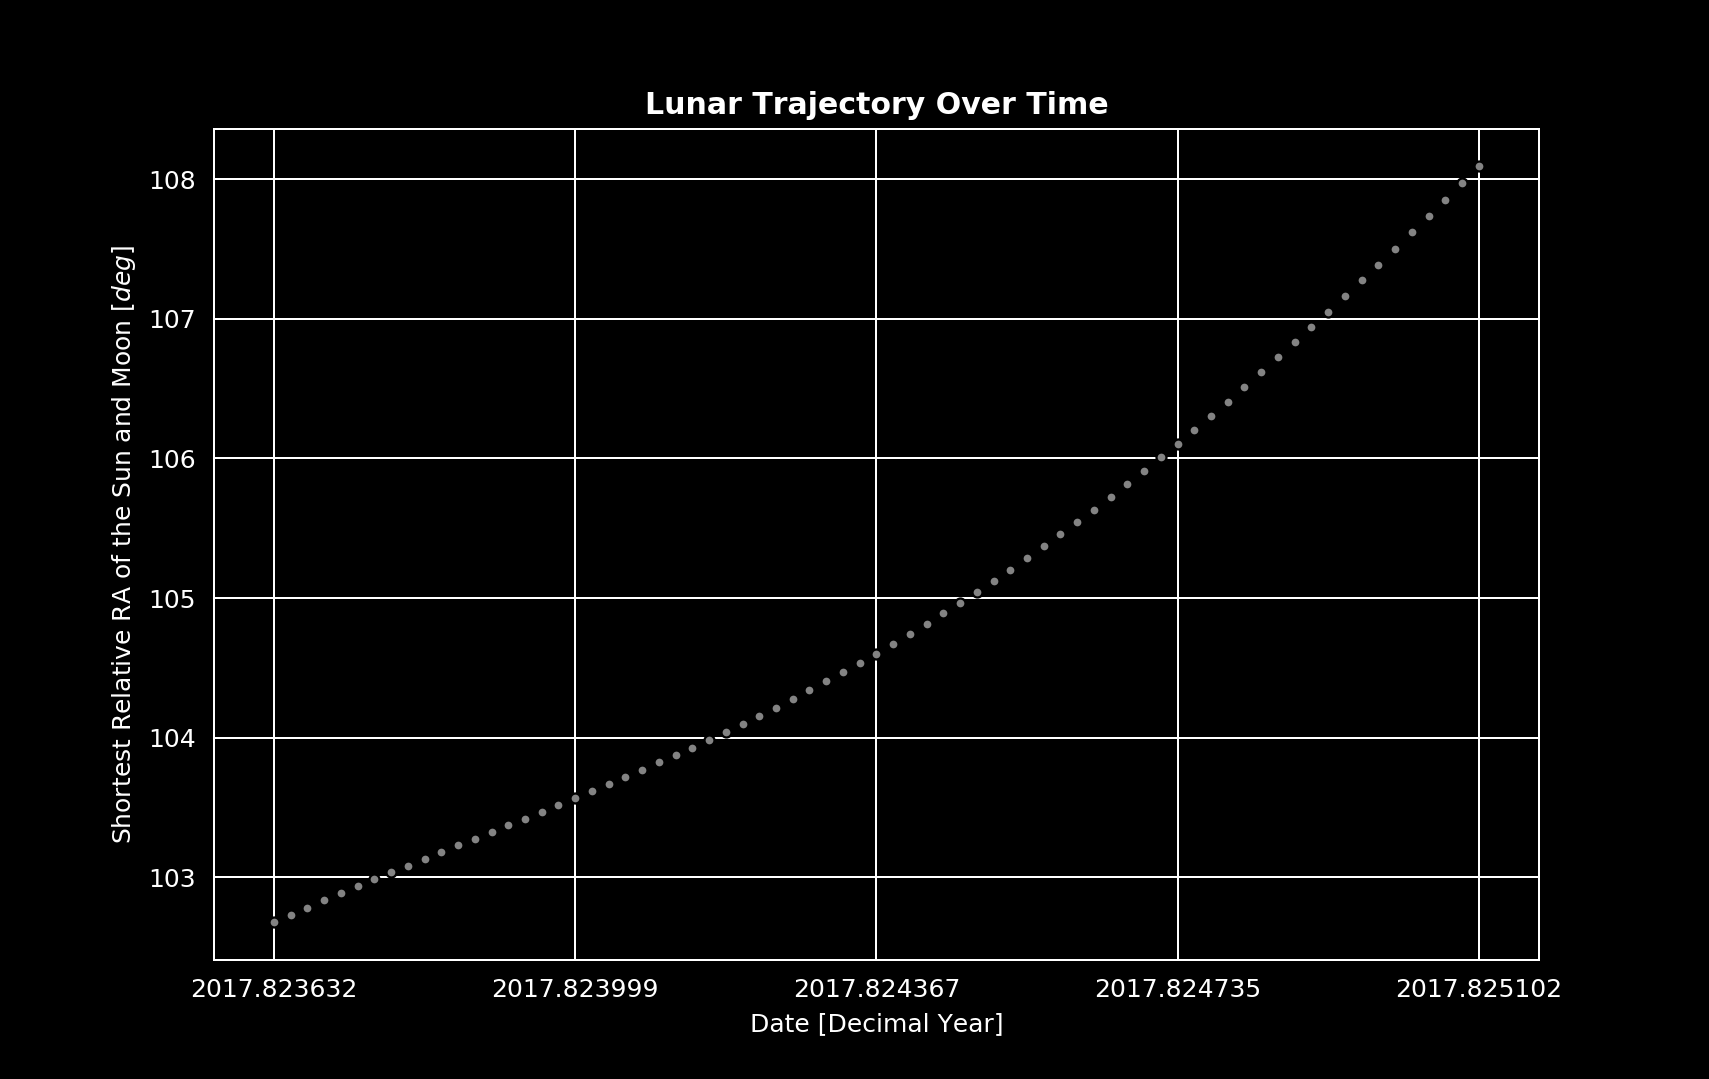

<IPython.core.display.Javascript object>


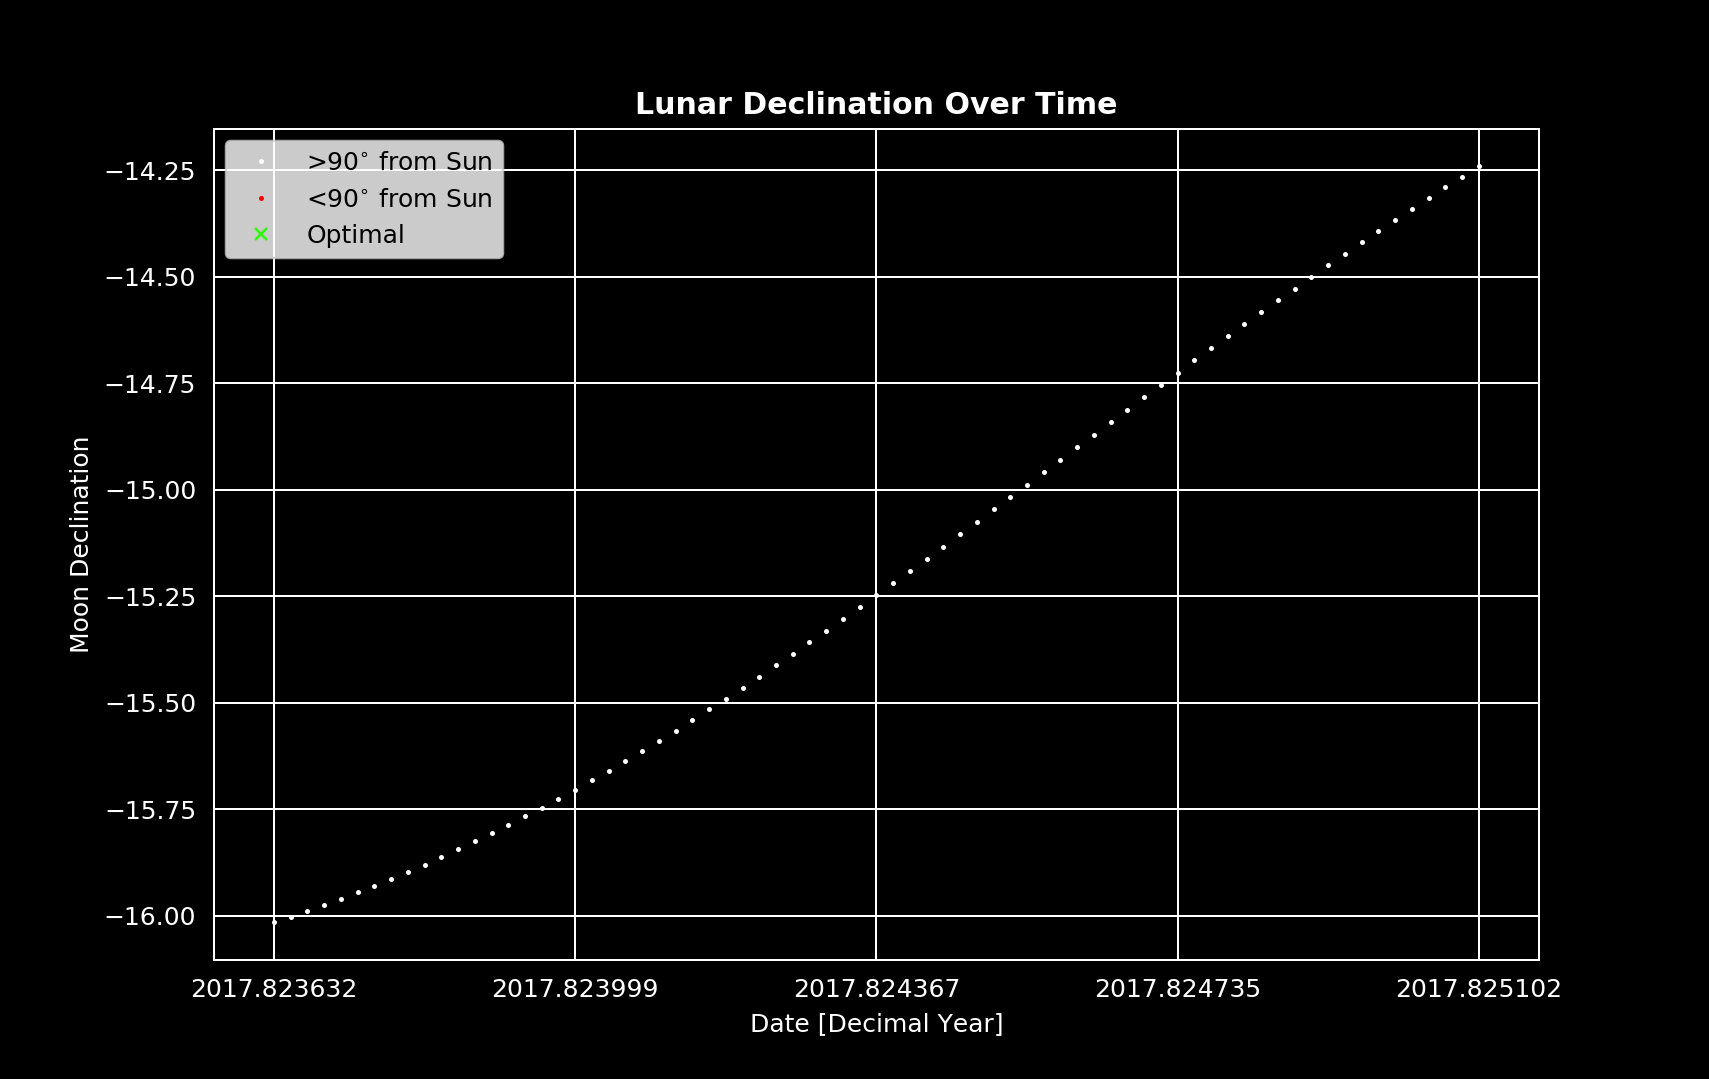

(<Figure size 950x600 with 1 Axes>, <Figure size 950x600 with 1 Axes>)

In [110]:
moon_sun_paths(jd55)

## Using ```moon_sun_paths``` for future years of HERA

The ```get_moon``` and ```get_sun``` functions from ```astropy``` only rely on a location and a list of dates, this allows these functions to output future dates and coordinates for these celestial objects. At a point in time the coordinates are sourced from previous movements of the Moon and Sun due to ```astropy``` not being able to guarantee the exact coordinates of the objects in question. However, these previous measurements are only off in a scale of tens of arcseconds.

In this next cell we will be exploring the Moon's path over HERA from August 2018 to the next Major Lunar Standstill on April 2025.

<IPython.core.display.Javascript object>


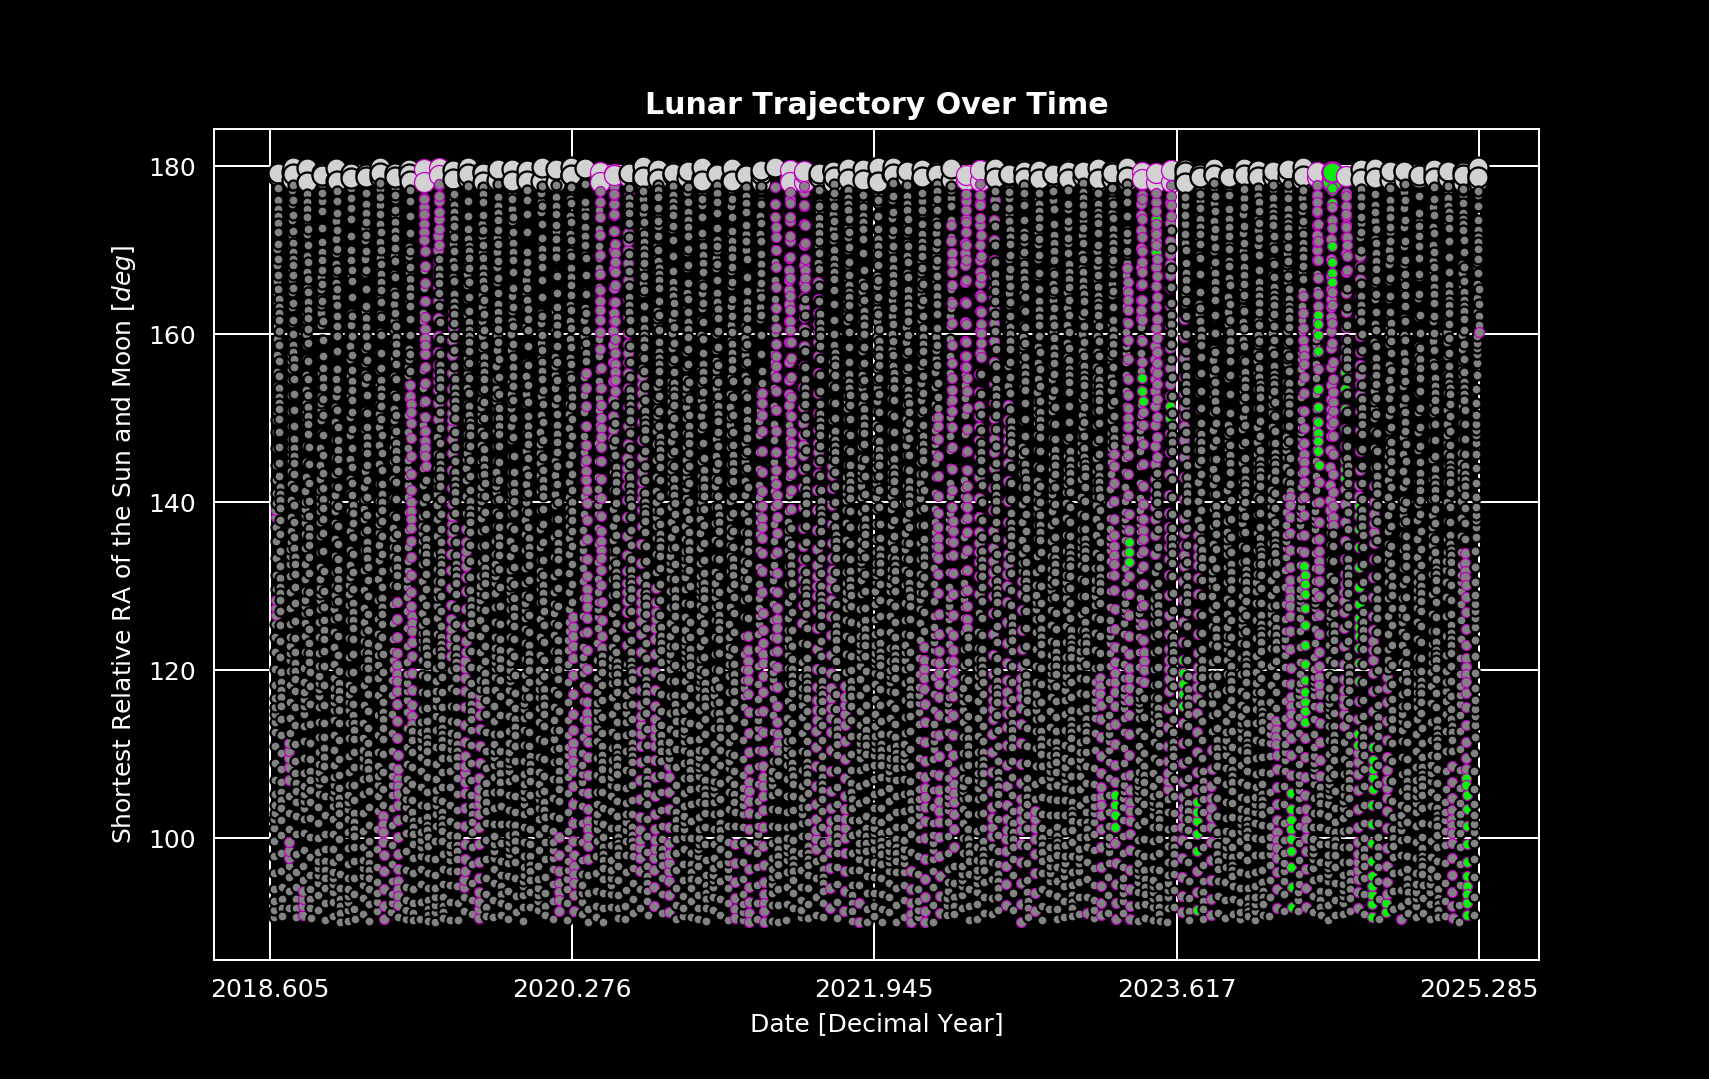

<IPython.core.display.Javascript object>


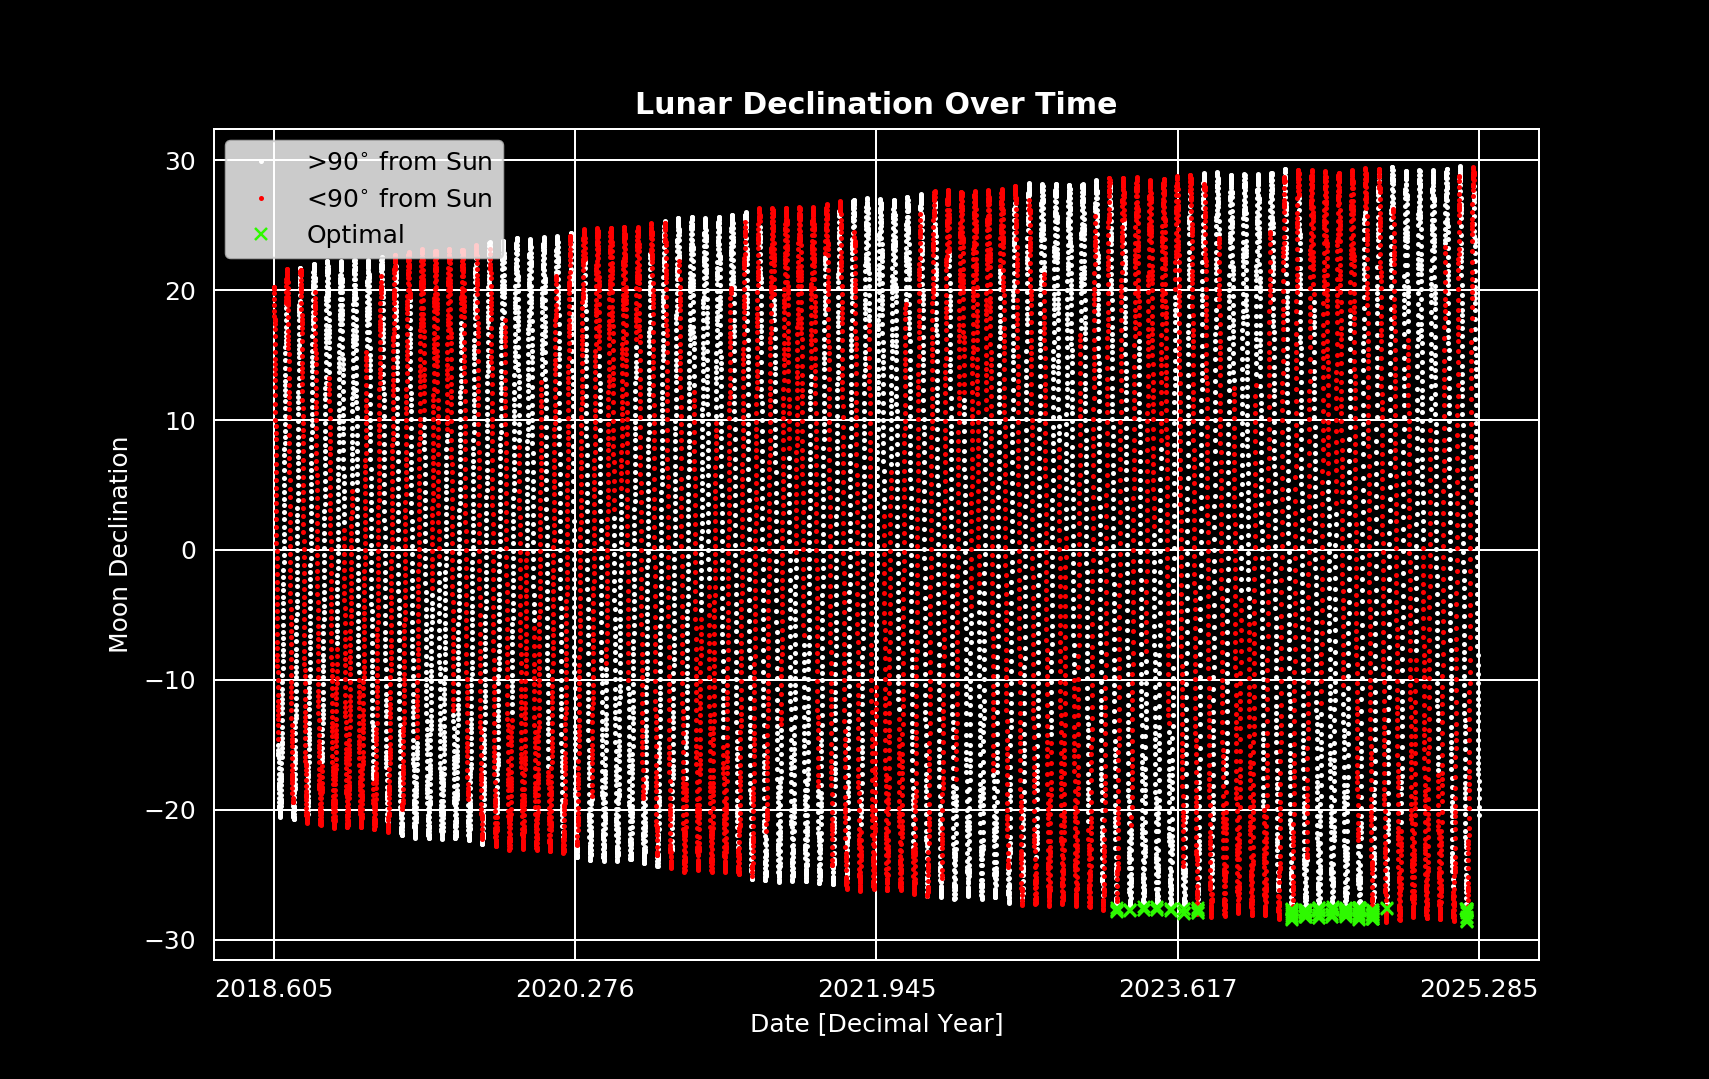

(<Figure size 950x600 with 1 Axes>, <Figure size 950x600 with 1 Axes>)

In [111]:
jd_future = np.linspace(2458340.5,2460780.5,20000) #From AUG 10, 2018 to APR 15, 2025
moon_sun_paths(jd_future)

As we can see in the scond plot the Moon's declination amplitude increases as it approaches Major Lunar Standstill. The significance of this becomes apparent in the first plot which points to the times in which the Moon is within optimal range. The first plot also highlights the many times an attempt at EME is able to pass the detection range of 3$\sigma$.

Let us take a look at one of the nights the Moon is in optimal range. Since the dataset does not exist yet, we'll just add the difference of future JDs to our ```jd55``` list and create a new list with the same time integrations.

For this instance we will make use of the ```printout``` arguments in ```moon_sun_paths``` to get a detailed list of datapoints for optimal EME and viewing of the moon.

<IPython.core.display.Javascript object>


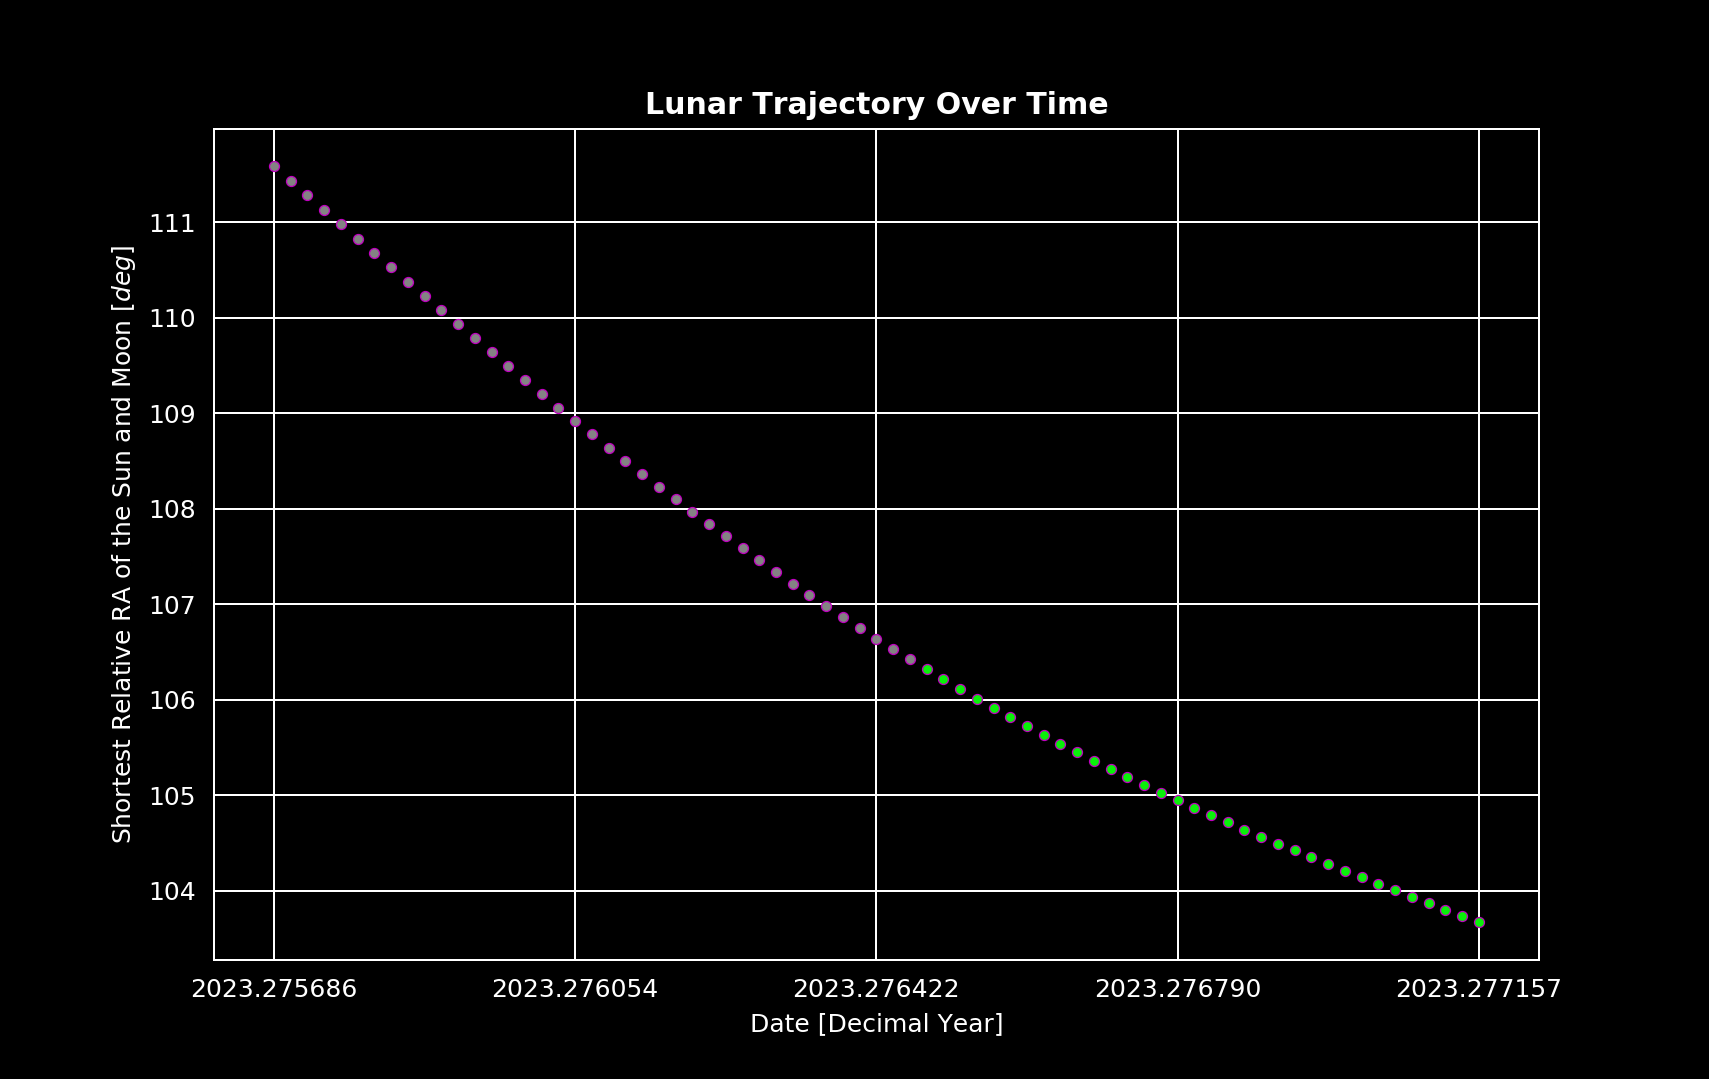

Optimal EME on 2460046.12552 2023-04-11T15:00:44.928 267.9478169801298 -26.894742437782742
Optimal EME on 2460046.13297 2023-04-11T15:11:28.608 268.1061242933458 -26.901446681719634
Optimal EME on 2460046.14043 2023-04-11T15:22:13.152 268.2646570589753 -26.908812870613705
Optimal EME on 2460046.14788 2023-04-11T15:32:56.832 268.4229094258433 -26.91682062758257
Optimal EME on 2460046.15534 2023-04-11T15:43:41.376 268.5812253863403 -26.92548948095277
Optimal EME on 2460046.1628 2023-04-11T15:54:25.920 268.7393117893035 -26.934805808535128
Optimal EME on 2460046.17025 2023-04-11T16:05:09.600 268.896877109091 -26.944751183233148
Optimal EME on 2460046.17771 2023-04-11T16:15:54.144 269.0542646990933 -26.95534632849124
Optimal EME on 2460046.18517 2023-04-11T16:26:38.688 269.21118376719147 -26.966571013504925
Optimal EME on 2460046.19262 2023-04-11T16:37:22.368 269.36734682405665 -26.97840031435975
Optimal EME on 2460046.20008 2023-04-11T16:48:06.912 269.5230958491448 -26.990856051924414
Opt

<IPython.core.display.Javascript object>


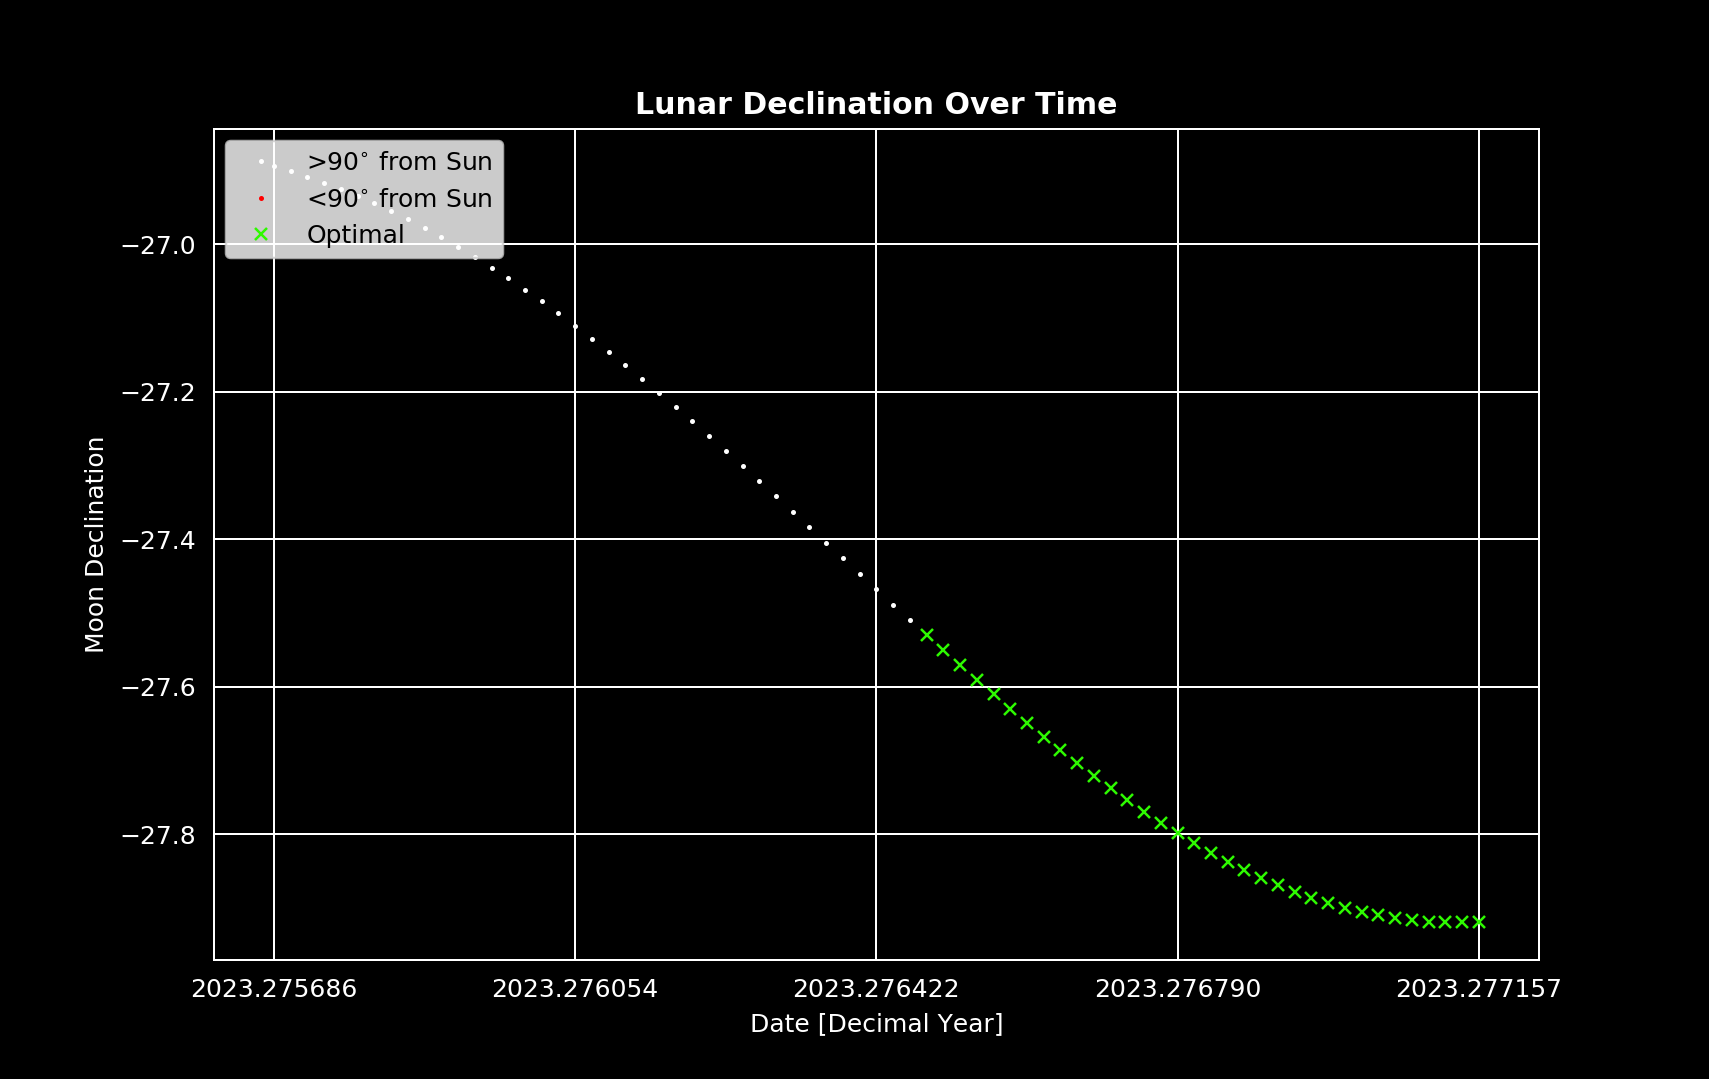

(<Figure size 950x600 with 1 Axes>, <Figure size 950x600 with 1 Axes>)

In [112]:
jd_oprange = []
for jd in range(len(jd55)):
     jd_oprange.append(jd55[jd]+1991.0)

moon_sun_paths(jd_oprange,True,True)